# Data Understanding

In [125]:
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [126]:

import warnings
warnings.filterwarnings('ignore')

In [127]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [128]:
%pip install xgboost lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [129]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [130]:
import pandas as pd
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('Data Set Diabetes.csv', delimiter=';')

styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000,1.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0.000000
2,8.000000,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000


**Tampilkan 5 data pertama dengan styling**

In [131]:
styled_df = df.head(5).style

# Set background color, text color, and border for the entire DataFrame
styled_df.set_properties(**{"background-color": "#254E58", "color": "#e9c46a", "border": "1.5px solid black"})

# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000,1.000000
1,1.000000,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0.000000
2,8.000000,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1.000000
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.000000
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.000000


**Informasi dasar dataset**

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 70.4 KB


**Ukuran dataset**

In [133]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 999 
Number of Columns : 9


In [134]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [135]:
df.columns = df.columns.str.strip() 

**Periksa nilai nol**

In [136]:
# Check and clean column names
print(df.columns)
df.columns = df.columns.str.strip()

column_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in column_zero:
    if col in df.columns:
        print(f'Jumlah nilai 0 di kolom {col}: {sum(df[col] == 0)}')
    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Jumlah nilai 0 di kolom Glucose: 5
Jumlah nilai 0 di kolom BloodPressure: 35
Jumlah nilai 0 di kolom SkinThickness: 227
Jumlah nilai 0 di kolom Insulin: 374
Jumlah nilai 0 di kolom BMI: 11


**Statistik deskriptif dengan styling**

In [137]:
styled_df = df.describe().style \
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#254E58'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'left'),
            ('padding', '8px')]
        },
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('color', '#333333')]  # warna font sel isi
        }
    ]) \
    .set_properties(**{
        'font-size': '14px',
        'background-color': '#F5F5F5',
        'color': '#333333',  # warna font default
        'border-collapse': 'collapse',
        'margin': '10px'
    })

# Tampilkan styled DataFrame
styled_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preparation

Ganti 0 dengan NaN

In [138]:
import numpy as np

for col in column_zero:
    df[col] = df[col].replace(0, np.nan)

**Cek missing values**

In [139]:
print(df.isnull().sum())

Pregnancies                 231
Glucose                     236
BloodPressure               266
SkinThickness               458
Insulin                     605
BMI                         242
DiabetesPedigreeFunction    231
Age                         231
Outcome                     231
dtype: int64


Isi missing value dengan madian kolom

In [140]:
df.fillna(df.median(), inplace=True)

Pisahkan fitur dan target

In [141]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Modelling

Split data train-test 80:20

In [142]:
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Inisialisasi model Naive Bayes**

In [143]:
model = GaussianNB()

**Latih model**

In [144]:
model.fit(X_train, y_train)

GaussianNB()

# Evaluation

**Prediksi data test**

In [145]:
y_pred = model.predict(X_test)

**Tampilkan hasil evaluasi**

In [146]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))


Accuracy: 0.79
Confusion Matrix:
 [[125  20]
 [ 22  33]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       145
         1.0       0.62      0.60      0.61        55

    accuracy                           0.79       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.79      0.79      0.79       200



**Deployment**

In [147]:
import joblib

# Simpan model ke file
joblib.dump(model, 'naive_bayes_diabetes_model.pkl')
print("Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'")

Model tersimpan sebagai 'naive_bayes_diabetes_model.pkl'


In [148]:
%pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [149]:
!ngrok config add-authtoken 2x7AjWOyQHJ2mZmNXK6Dj84fjHI_BnPLhZuVowk7yiK3b5vh

Authtoken saved to configuration file: C:\Users\fakhr\AppData\Local/ngrok/ngrok.yml


In [150]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [151]:
import streamlit as st

In [152]:
import pandas as pd

df = pd.read_csv("Data Set Diabetes.csv", sep=';')  # tambahkan separator

# Bersihkan nama kolom
df.columns = df.columns.str.strip().str.replace(' ', '').str.lower()
print(df.columns.tolist())  # Cek hasilnya

# Sekarang bisa ambil semua fitur
X = df[['pregnancies', 'glucose', 'bloodpressure', 'skinthickness',
        'insulin', 'bmi', 'diabetespedigreefunction', 'age']]
y = df['outcome']


['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'outcome']


2025-06-04 14:32:15.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.281 No runtime found, using MemoryCacheStorageManager
2025-06-04 14:32:15.282 No runtime found, using MemoryCacheStorageManager
2025-06-04 14:32:15.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-04 14:32:15.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

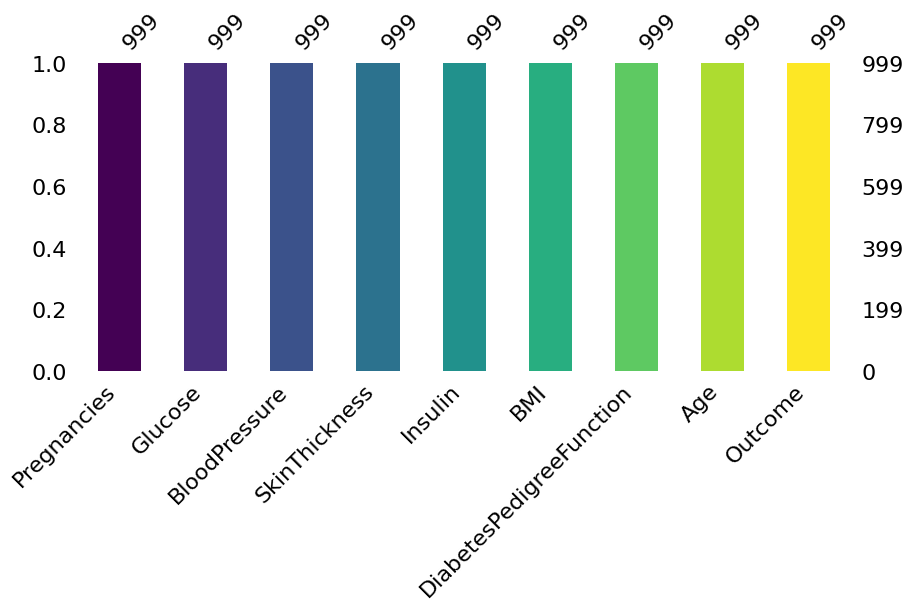

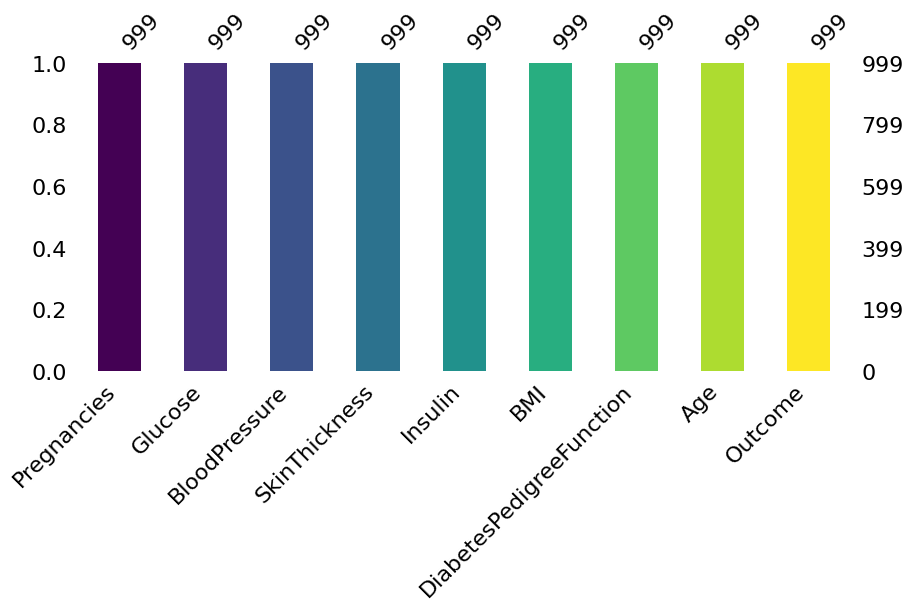

In [153]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import joblib
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

st.set_page_config(page_title="Prediksi Diabetes", page_icon="🩺", layout="wide")

@st.cache_data
@st.cache_data
def load_data():
    df = pd.read_csv("Data Set Diabetes.csv", delimiter=";")
    df.columns = df.columns.str.strip()
    # Ganti 0 dengan NaN untuk kolom tertentu
    for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        df[col] = df[col].replace(0, np.nan)
    # Isi NaN dengan median kolom
    df.fillna(df.median(numeric_only=True), inplace=True)
    return df

@st.cache_resource
def load_model():
    return joblib.load("naive_bayes_diabetes_model.pkl")

def plot_roc_curve(model, df):
    X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
    y = df["Outcome"]

    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")
    return fig

def show_missing_values(df):
    fig, ax = plt.subplots(figsize=(10, 4))
    num_columns = len(df.columns)
    colors = plt.cm.viridis(np.linspace(0, 1, num_columns))
    msno.bar(df, color=colors, ax=ax)
    st.pyplot(fig)

def show_clustering(df):
    #preprocess
    features = df.drop("Outcome", axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    #k-means
    kmeans= KMeans(n_clusters=3, random_state=42, n_init="auto")
    clusters =kmeans.fit_predict(scaled_features)

    #PCA
    pca=PCA(n_components=2)
    pca_result= pca.fit_transform(scaled_features)

    #Transform user input
    user_scaled = scaler.transform(input_df)
    user_pca = pca.transform(user_scaled)
    user_cluster = kmeans.predict(user_scaled)[0]

        # Hitung Silhouette Score
    sil_score = silhouette_score(scaled_features, clusters)

    st.markdown(f"📈 **Silhouette Score untuk KMeans (k=3):** `{sil_score:.4f}`")
    if sil_score < 0.5:
        st.info("🔍 Skor ini menunjukkan bahwa clustering masih bisa diperbaiki. Mungkin k terlalu kecil atau data overlap.")
    elif sil_score < 0.7:
        st.success("👍 Clustering cukup baik, tapi masih ada sedikit overlap.")
    else:
        st.success("🚀 Clustering sangat baik! Cluster saling terpisah jelas.")


    # DataFrame untuk visualisasi
    pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
    pca_df["Cluster"] = clusters.astype(str)

    # Plot
    st.subheader("📊 Hasil Clustering (berdasarkan input Anda)")

    fig = go.Figure()

    # Tambahkan data semua cluster
    for clust in sorted(pca_df["Cluster"].unique()):
        subset = pca_df[pca_df["Cluster"] == clust]
        fig.add_trace(go.Scatter(
            x=subset["PCA1"], y=subset["PCA2"],
            mode='markers',
            name=f'Cluster {clust}',
            marker=dict(size=7),
            opacity=0.6
        ))

    # Tambahkan titik user
    fig.add_trace(go.Scatter(
        x=[user_pca[0][0]], y=[user_pca[0][1]],
        mode='markers+text',
        name="Anda",
        marker=dict(size=12, color='black', symbol='x'),
        text=["Anda"],
        textposition="top center"
    ))

    fig.update_layout(title="Visualisasi PCA Clustering (Dengan Input Anda)", 
                      xaxis_title="PCA1", yaxis_title="PCA2")
    st.plotly_chart(fig)

    st.markdown(f"📌 **Input Anda termasuk dalam Cluster {user_cluster}**")
# Load data & model
df = load_data()
model = load_model()

st.title("Dashboard Prediksi Diabetes 🩺")
st.markdown("Prediksi kemungkinan diabetes berdasarkan data medis menggunakan model Naive Bayes.")

col1, col2 = st.columns(2)
with col1:
    pregnancies = st.slider("Pregnancies", int(df.Pregnancies.min()), int(df.Pregnancies.max()), int(df.Pregnancies.mean()))
    glucose = st.slider("Glucose", int(df.Glucose.min()), int(df.Glucose.max()), int(df.Glucose.mean()))
    bp = st.slider("BloodPressure", int(df.BloodPressure.min()), int(df.BloodPressure.max()), int(df.BloodPressure.mean()))
    skin = st.slider("SkinThickness", int(df.SkinThickness.min()), int(df.SkinThickness.max()), int(df.SkinThickness.mean()))

with col2:
    insulin = st.slider("Insulin", int(df.Insulin.min()), int(df.Insulin.max()), int(df.Insulin.mean()))
    bmi = st.slider("BMI", float(df.BMI.min()), float(df.BMI.max()), float(df.BMI.mean()))
    dpf = st.slider("DiabetesPedigreeFunction", float(df.DiabetesPedigreeFunction.min()), float(df.DiabetesPedigreeFunction.max()), float(df.DiabetesPedigreeFunction.mean()))
    age = st.slider("Age", int(df.Age.min()), int(df.Age.max()), int(df.Age.mean()))

# Pastikan input_df sesuai urutan & nama kolom saat training
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
input_df = pd.DataFrame([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]], columns=feature_names)

if st.button("Prediksi"):
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0]

    st.subheader("🔍 Hasil Prediksi")
    if prediction == 1:
        st.error(f"🩸 Diabetes dengan probabilitas {probability[1]:.2%}")
    else:
        st.success(f"✅ Tidak Diabetes dengan probabilitas {probability[0]:.2%}")

    st.plotly_chart(
        go.Figure(data=[go.Bar(x=["Tidak Diabetes", "Diabetes"], y=probability, marker_color=['blue', 'red'])])
        .update_layout(title="Probabilitas Kelas", yaxis=dict(range=[0,1]))
    )

    st.pyplot(plot_roc_curve(model, df))

    st.markdown("### 💡 Rekomendasi")
    if prediction == 1:
        st.markdown("- Konsultasi dengan dokter segera.\n- Pantau kadar gula darah secara rutin.")
    else:
        st.markdown("- Jaga pola makan sehat.\n- Lanjutkan gaya hidup aktif.")

# Tambahan: Visualisasi Missing Value
st.markdown("---")
st.subheader("📉 Visualisasi Missing Value")
show_missing_values(df)

# Tambahan: Clustering
st.markdown("---")
show_clustering(df)


In [154]:
from pyngrok import ngrok
import threading
import os
def run_streamlit():
  os.system("streamlit run app.py --server.port 8501")
thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://c1b9-180-252-113-100.ngrok-free.app" -> "http://localhost:8501"
